In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import wrangle
from wrangle import acquire_telco
from wrangle import clean_telco
from sklearn.model_selection import train_test_split

Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
df = wrangle.acquire_telco()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = clean_telco(df)

In [5]:
df.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7469-LKBCI,16,18.95,326.80
3655-SNQYZ,69,113.25,7895.15
9959-WOFKT,71,106.70,7382.25
3638-WEABW,58,59.90,3505.10
5248-YGIJN,72,90.25,6369.45


In [30]:
from wrangle import split_telco

In [31]:
train, validate, test = split_telco(df) 

In [32]:
train.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
8819-ZBYNA,58,109.10,6393.65
7322-OCWHC,72,93.05,6735.05
3720-DBRWL,51,83.85,4307.10
3841-NFECX,71,96.35,6766.95
6656-GULJQ,72,83.55,6093.30


<AxesSubplot:>

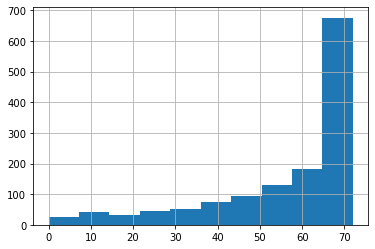

In [9]:
train.tenure.hist()

<AxesSubplot:>

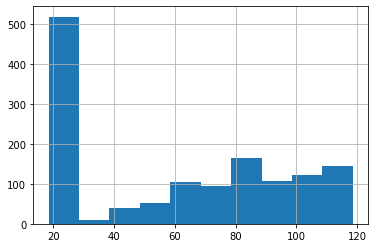

In [10]:
train.MonthlyCharges.hist()

<AxesSubplot:>

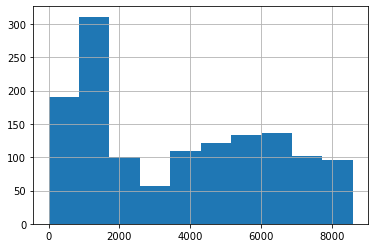

In [11]:
train.TotalCharges.hist()

1) Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

In [12]:
import sklearn.preprocessing

In [13]:
# Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [14]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
scaler.fit(train)

MinMaxScaler()

In [15]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [16]:
train_scaled[0:5]

array([[0.80555556, 0.90473815, 0.7439321 ],
       [1.        , 0.7446384 , 0.78365564],
       [0.70833333, 0.65286783, 0.50115191],
       [0.98611111, 0.77755611, 0.78736736],
       [1.        , 0.64987531, 0.70898492]])

In [17]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [18]:
train_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,0.805556,0.904738,0.743932
1,1.000000,0.744638,0.783656
2,0.708333,0.652868,0.501152
3,0.986111,0.777556,0.787367
4,1.000000,0.649875,0.708985


<AxesSubplot:>

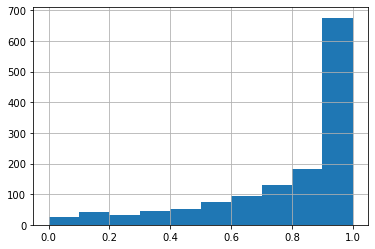

In [19]:
train_scaled.tenure.hist()

<AxesSubplot:>

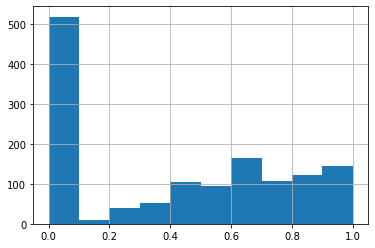

In [20]:
train_scaled.MonthlyCharges.hist()

<AxesSubplot:>

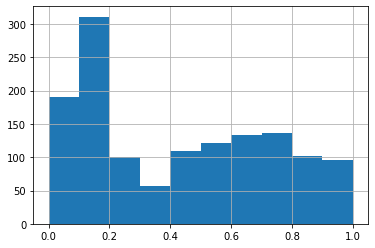

In [21]:
train_scaled.TotalCharges.hist()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

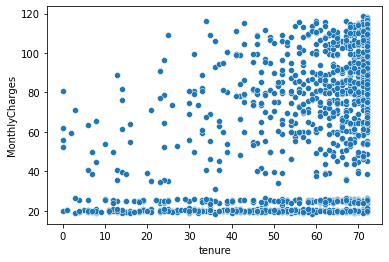

In [22]:
sns.scatterplot(x="tenure", y="MonthlyCharges", data=train)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

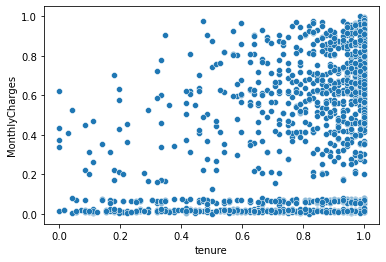

In [23]:
sns.scatterplot(x="tenure", y="MonthlyCharges", data=train_scaled)

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [24]:
train_scaled_i = scaler.inverse_transform(train)
validate_scaled_i = scaler.inverse_transform(validate)
test_scaled_i = scaler.inverse_transform(test)

In [25]:
train_scaled_i = pd.DataFrame(train_scaled_i, columns=train.columns)
validate_scaled_i = pd.DataFrame(validate_scaled_i, columns=train.columns)
test_scaled_i = pd.DataFrame(test_scaled_i, columns=train.columns)

<AxesSubplot:>

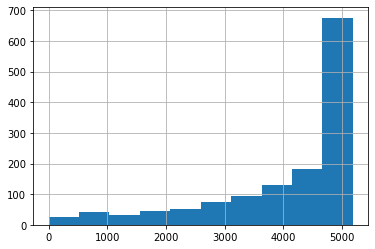

In [26]:
train_scaled_i.tenure.hist()

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [27]:
from sklearn.preprocessing import QuantileTransformer

In [35]:
scaler = QuantileTransformer(output_distribution='normal')

In [36]:
train.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
8819-ZBYNA,58,109.10,6393.65
7322-OCWHC,72,93.05,6735.05
3720-DBRWL,51,83.85,4307.10
3841-NFECX,71,96.35,6766.95
6656-GULJQ,72,83.55,6093.30


In [37]:
scaler.fit_transform(train)

array([[-0.31633038,  1.29169268,  0.84433009],
       [ 5.19933758,  0.76283199,  0.99389426],
       [-0.59843525,  0.4442988 ,  0.17183554],
       ...,
       [-1.14248313, -0.04302542, -0.20070841],
       [ 0.71359852, -0.67448975, -0.37592805],
       [ 0.09801306, -1.9510504 , -0.70652609]])

In [38]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [39]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

<AxesSubplot:>

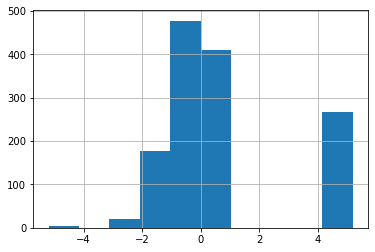

In [43]:
train_scaled.tenure.hist()

<AxesSubplot:>

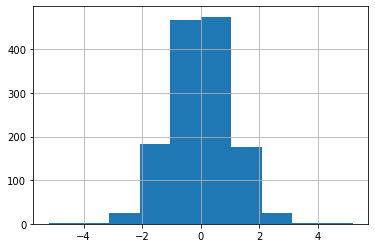

In [41]:
train_scaled.MonthlyCharges.hist()

<AxesSubplot:>

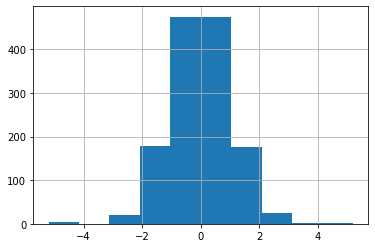

In [42]:
train_scaled.TotalCharges.hist()

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
